# Predicting Stock Prices with Linear Regression

# Import Libraries

In [5]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data=pd.read_csv("sap_stock.csv")

In [8]:
data.head()

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,NaN,NaN,NaN
1,2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,NaN,NaN,NaN
2,2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,NaN,NaN,NaN
3,2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,NaN,NaN,NaN
4,2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,NaN,NaN,NaN


In [9]:
# Check data types in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2550 non-null   object 
 1   Open                   2242 non-null   float64
 2   High                   2543 non-null   float64
 3   Low                    2543 non-null   float64
 4   Close                  2550 non-null   float64
 5   Change                 11 non-null     float64
 6   Traded Volume          2504 non-null   float64
 7   Turnover               2497 non-null   float64
 8   Last Price of the Day  0 non-null      float64
 9   Daily Traded Units     0 non-null      float64
 10  Daily Turnover         7 non-null      float64
dtypes: float64(10), object(1)
memory usage: 219.3+ KB


In [10]:
# Get descriptive statistics summary of data set 
data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
count,2242.000000,2543.000000,2543.000000,2550.000000,11.000000,2.504000e+03,2.497000e+03,0.0,0.0,7.0
mean,56.686896,61.563225,60.535073,60.995955,-0.070000,3.296818e+06,1.828440e+08,NaN,NaN,0.0
std,18.320821,21.184135,20.934460,21.097480,0.709761,2.004323e+06,9.350710e+07,NaN,NaN,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,1.767350e+05,NaN,NaN,0.0
25%,41.500000,43.430000,42.590000,42.950000,-0.500000,2.131686e+06,1.300462e+08,NaN,NaN,0.0
50%,56.560000,58.480000,57.580000,58.015000,-0.290000,2.852772e+06,1.626544e+08,NaN,NaN,0.0
75%,67.732500,78.365000,77.085000,77.762500,0.085000,3.878528e+06,2.104511e+08,NaN,NaN,0.0
max,100.100000,108.520000,107.020000,107.800000,1.250000,3.645671e+07,1.369431e+09,NaN,NaN,0.0


In [11]:
# Display features in data set
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume',
       'Turnover', 'Last Price of the Day', 'Daily Traded Units',
       'Daily Turnover'],
      dtype='object')

In [ ]:
*Select Subset with relevant features*
We use the daily closing price Close as the value to predict, so we can discard the other features.

'Close' column has numerical data type
The 'Date' is the index column and contains datetime values

In [29]:
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(data, columns=['Date','Close'])

# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index(drop=True)

In [30]:
df.head()

,Date,Close
0,2009-03-09,25.59
1,2009-03-10,26.87
2,2009-03-11,26.64
3,2009-03-12,26.18
4,2009-03-13,25.73


In [31]:
# Check data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2550 non-null   object 
 1   Close   2550 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.0+ KB


In [32]:
# Check for missing values in the columns
df.isna().values.any()

False

# Explore the Data


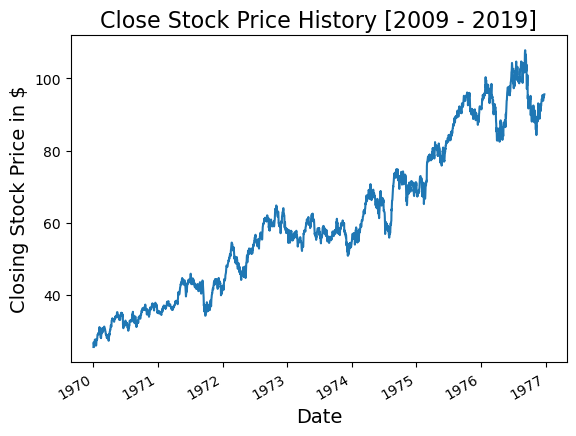

In [33]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2009 - 2019]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

# Linear Regressionel
Train Test Split

In [34]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [35]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

In [36]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [37]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [39]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

In [41]:
# Assuming `model.coef_` is a NumPy array
# The coefficient
print('Slope: ', np.squeeze(model.coef_).item())
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.027563369761421257
Intercept:  25.721588126517425


Interpreting the coefficients:

The slope coefficient tells us that with a 1 unit increase in date the closing price increases by 0.0276 $
The intercept coefficient is the price at wich the closing price measurement started, the stock price value at date zero

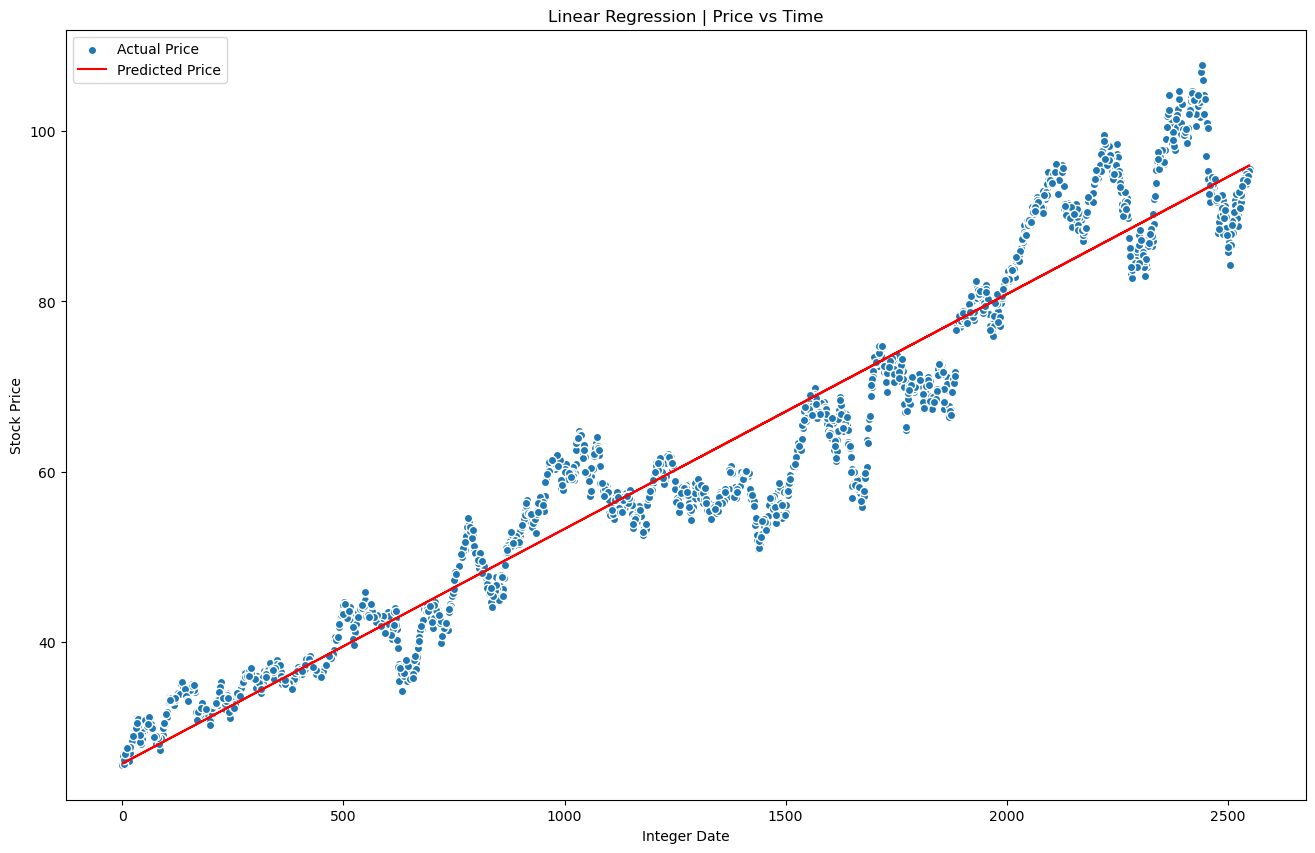

In [42]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [43]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [58]:
# Generate array with predicted values
y_pred = model.predict(X_test)

In [83]:
# Ensure the predictions are generated for the entire dataset if needed
X_full = np.array(df.index).reshape(-1, 1)  # Full dataset index reshaped for prediction
y_pred_full = model.predict(X_full)  # Predict for all rows in df

# Add the predictions to the DataFrame as a new column
df['Predicted_Close'] = y_pred_full

# Check the shape to verify that the new column has been added
print(df.shape)  # Should print (2550, 3)

# Display a few rows to confirm the new column
print(df.head())


(2550, 3)
         Date  Close  Predicted_Close
0  2009-03-09  25.59        25.721588
1  2009-03-10  26.87        25.749151
2  2009-03-11  26.64        25.776715
3  2009-03-12  26.18        25.804278
4  2009-03-13  25.73        25.831842


In [73]:
# Get number of rows in data set for random sample
df.shape

(2550, 3)

In [66]:
# Generate 25 random numbers
randints = np.random.randint(2550, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [75]:
df_sample.head()

,Date,Close,Predicted_Close
25,2009-04-13,29.005,26.410672
137,2009-09-16,34.610,29.497770
242,2010-02-10,31.740,32.391924
400,2010-09-22,36.450,36.746936
425,2010-10-27,37.230,37.436020


In [76]:
print(df_sample.columns)

Index(['Date', 'Close', 'Predicted_Close'], dtype='object')


Text(0, 0.5, 'Stock Price in $')

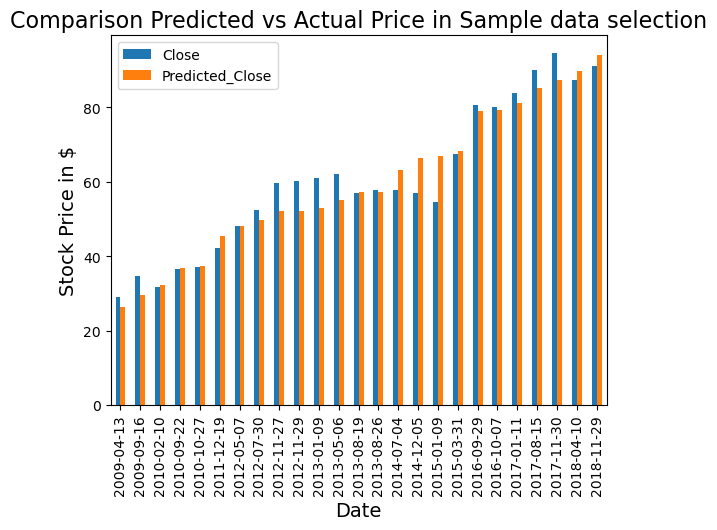

In [77]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Close', 'Predicted_Close'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot

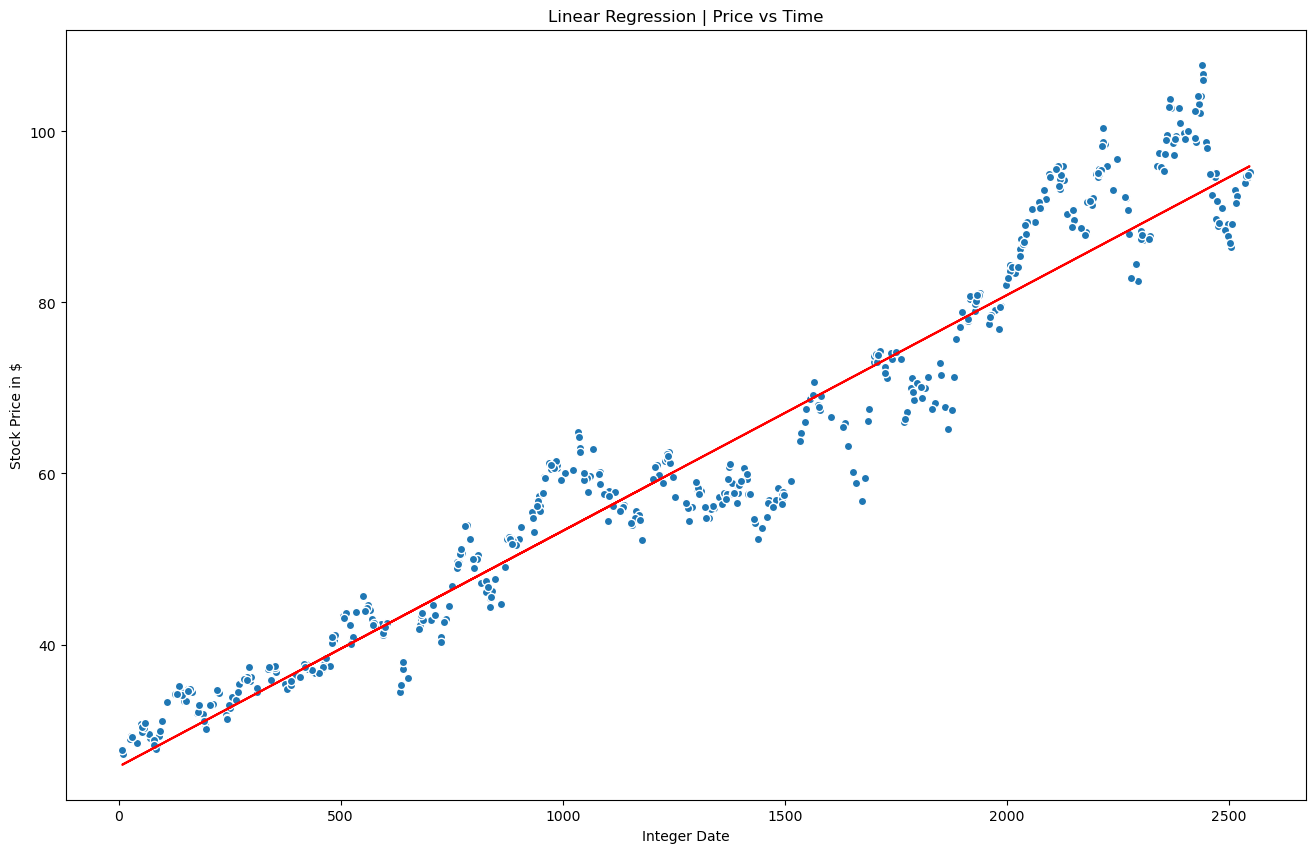

In [78]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()

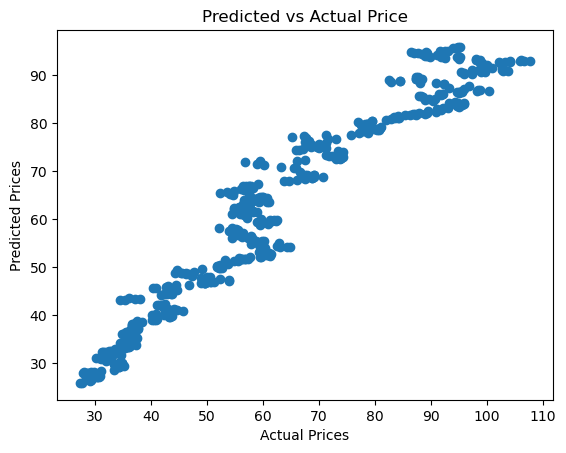

In [79]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

C:\Users\Barath\AppData\Local\Temp\ipykernel_6188\2536529651.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')
C:\Users\Barath\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


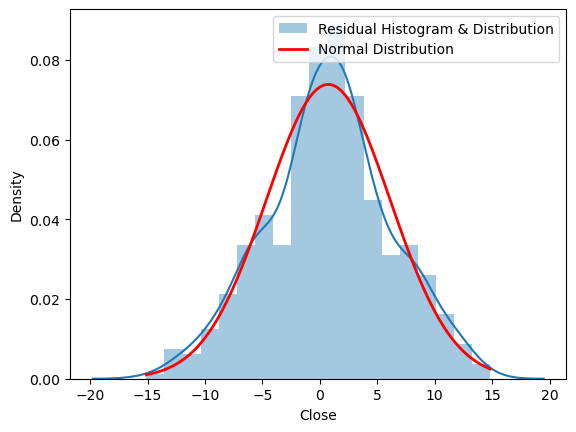

In [80]:
# Import norm package to plot normal distribution
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()

In [88]:

# Add new column for predictions to df
df['Predicted_Close'] = model.predict(np.array(df.index).reshape(-1, 1))

In [89]:
df.head()

,Date,Close,Predicted_Close
0,2009-03-09,25.59,25.721588
1,2009-03-10,26.87,25.749151
2,2009-03-11,26.64,25.776715
3,2009-03-12,26.18,25.804278
4,2009-03-13,25.73,25.831842


In [90]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [91]:
# Statistical summary of test data
df['Close'].describe()

count    2550.000000
mean       60.995955
std        21.097480
min        25.590000
25%        42.950000
50%        58.015000
75%        77.762500
max       107.800000
Name: Close, dtype: float64

# Error Metrics

In [92]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.281498738042458
Mean Squared Error: 29.669404743182525
Root Mean Squared Error: 5.446962891665641


# Model Accuracy

In [93]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.938800366499087


In [94]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9398823710210962